## Import packages

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [4]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params as n_counts_simulator
importlib.reload(n_counts_simulator)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params.py'>

In [5]:
log10masses = np.linspace(14, 15.5, num = 2)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)
log10masses_2d = np.stack((log10masses[:-1], log10masses[1:]))

In [6]:
lower = np.array([0.1125, 0.65])
upper = np.array([0.1275, 0.85])
prior = priors.Uniform(lower, upper)

In [7]:
theta_fiducial = np.array([0.1197, 0.76])

In [8]:
N_countsSimulator = n_counts_simulator.Model(log10masses, z_min, z_max)
N_counts = N_countsSimulator.N_counts
#N_counts = N_countsSimulator.simulation(theta_fiducial, 1)
N_counts

array([22926.84511865, 68010.58076614, 85143.87570284, 74152.91292208,
       51774.03079771])

In [9]:
t1 = time.process_time()
N_countsSimulator.simulation(theta_fiducial, 1)
t2 = time.process_time()
print('time per 1 sim: '+ str(t2-t1))

time per 1 sim: 0.33391815999999963


## Version 1

(1) Compute fiducial number of counts N for redshift bins (for a range of masses, 14 to 15.5)

(2) Draw N samples from uniformly distributed redshift bins

(3) Draw masses for every redshift

(4) Create mock catalogue

In [23]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v1 as n_counts_simulator_2

In [24]:
importlib.reload(n_counts_simulator_2)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v1' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params_mock_catalogue_v1.py'>

In [25]:
N_countsSimulator = n_counts_simulator_2.Model(log10masses, z_min, z_max)

In [26]:
t1 = time.process_time()
mock_pairs = N_countsSimulator.simulation(theta_fiducial, 1)
t2 = time.process_time()
print('time per 1 sim: '+ str(t2-t1))

time per 1 sim: 0.7178933250000004


In [27]:
mock_pairs.shape

(302009, 2)

Text(0, 0.5, 'Number of counts per bin')

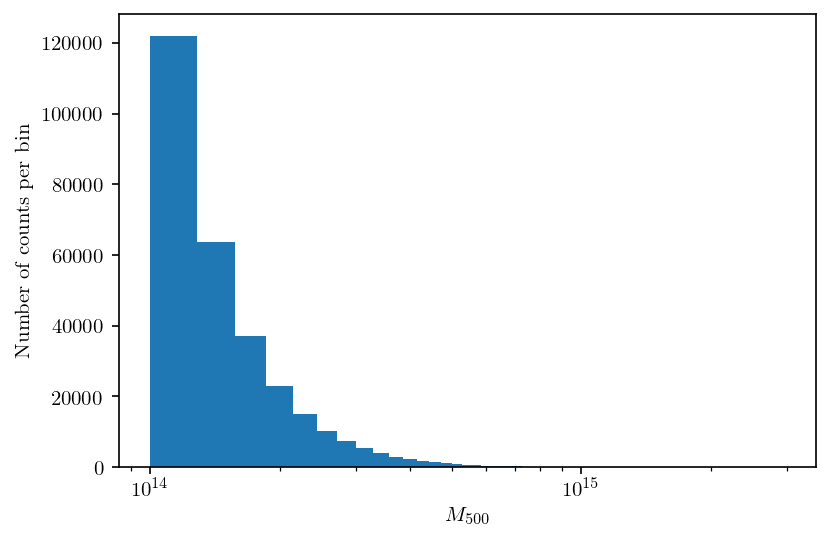

In [28]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(mock_pairs[:, 0], 100, align='mid')
plt.xlabel(r'$M_{500}$')
plt.xscale('log')
plt.ylabel('Number of counts per bin')

## Version 2

(1) Compute fiducial number of counts N for different redshift bins (for a range of masses, 14 to 15.5)

(2) Draw N samples from joint redshift-mass distribution

(3) Create mock catalogue

In [29]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2 as n_counts_simulator_2

In [30]:
importlib.reload(n_counts_simulator_2)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params_mock_catalogue_v2.py'>

In [31]:
N_countsSimulator = n_counts_simulator_2.Model(log10masses, z_min, z_max)

In [32]:
t1 = time.process_time()
mock_pairs_2 = N_countsSimulator.simulation(theta_fiducial, 1)
t2 = time.process_time()
print('time per 1 sim: '+ str(t2-t1))

time per 1 sim: 0.4331194689999993


In [34]:
mock_pairs_2.shape

(302009, 2)

Text(0, 0.5, 'Number of counts per bin')

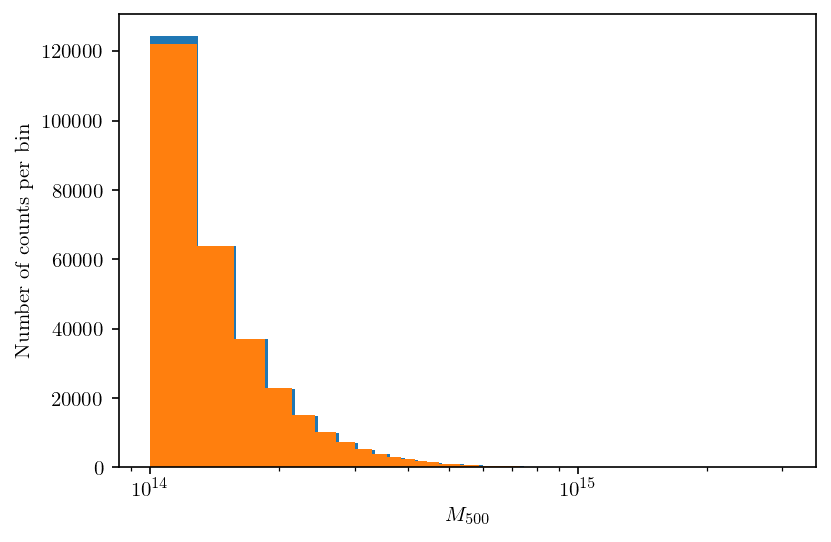

In [36]:
import matplotlib.pyplot as plt
count2, bins2, ignored2 = plt.hist(mock_pairs_2[:, 0], 100, align='mid')
count, bins, ignored = plt.hist(mock_pairs[:, 0], 100, align='mid')
plt.xlabel(r'$M_{500}$')
plt.xscale('log')
plt.ylabel('Number of counts per bin')

In [38]:
np.unique(mock_pairs).shape

(3627,)

In [39]:
mock_pairs.shape

(302009, 2)

## Version 3

(1) Compute fiducial number of counts N for all mass-redshift bins (for a range of masses, 14 to 15.5)

(2) Draw N samples from joint redshift-mass distribution

(3) Create mock catalogue

In [89]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v3 as n_counts_simulator_2

In [90]:
importlib.reload(n_counts_simulator_2)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v3' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params_mock_catalogue_v3.py'>

In [91]:
N_countsSimulator = n_counts_simulator_2.Model()

In [92]:
N_countsSimulator.N_counts

(array([575715.86885014]),
 pyccl.Cosmology(Omega_c=0.25141776937618154, Omega_b=0.04667086746481833, h=0.69, n_s=0.9655, sigma8=0.76, A_s=None, Omega_k=0, Omega_g=0, Neff=0, w0=-1, wa=0, T_CMB=2.7, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='bbks', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker', halo_concentration='duffy2008', emulator_neutrinos='strict'))

In [93]:
t1 = time.process_time()
mock_pairs = N_countsSimulator.simulation(theta_fiducial, 1)
t2 = time.process_time()
print('time per 1 sim: '+ str(t2-t1))

time per 1 sim: 0.8808431089999971


In [94]:
mock_pairs.shape

(575716, 2)